In [1]:
import pandas as pd
from ipynb.fs.full.utils import get_df, rename_values, replace_values_by_condition
from ipynb.fs.full.plots import single_barplot, wordcloud

In [2]:
df = get_df()
df = df[['D10_ML_Management_Framework_None', 'D10_ML_Management_Framework_CRISP-DM', 'D10_ML_Management_Framework_Kanban',
         'D10_ML_Management_Framework_Lean','D10_ML_Management_Framework_RUP', 'D10_ML_Management_Framework_SAFe', 
         'D10_ML_Management_Framework_Scrum', 'D10_ML_Management_Framework_Others', 'D10_ML_Management_Framework_Others_Free']]
df.head(10)

,D10_ML_Management_Framework_None,D10_ML_Management_Framework_CRISP-DM,D10_ML_Management_Framework_Kanban,D10_ML_Management_Framework_Lean,D10_ML_Management_Framework_RUP,D10_ML_Management_Framework_SAFe,D10_ML_Management_Framework_Scrum,D10_ML_Management_Framework_Others,D10_ML_Management_Framework_Others_Free
2,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
3,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,-99
4,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
5,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,-99
6,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
7,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,quoted,not quoted,-99
8,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,-99
9,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
10,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
11,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99


In [3]:
label = ['Nenhum', 'CRISP', 'KANBAN', 'Lean', 'RUP', 'SAFe', 'Scrum']
frameworks = [
    df['D10_ML_Management_Framework_None'].value_counts()['quoted'],
    df['D10_ML_Management_Framework_CRISP-DM'].value_counts()['quoted'],
    df['D10_ML_Management_Framework_Kanban'].value_counts()['quoted'],
    df['D10_ML_Management_Framework_Lean'].value_counts()['quoted'],
    df['D10_ML_Management_Framework_RUP'].value_counts()['quoted'],
    df['D10_ML_Management_Framework_SAFe'].value_counts()['quoted'],
    df['D10_ML_Management_Framework_Scrum'].value_counts()['quoted']
]

In [4]:
d10_df= pd.DataFrame(data={'Project Context': label, 'Answers': frameworks})

In [5]:
print(d10_df)

  Project Context  Answers
0          Nenhum       67
1           CRISP       41
2          KANBAN       83
3            Lean       16
4             RUP        3
5            SAFe        8
6           Scrum      139


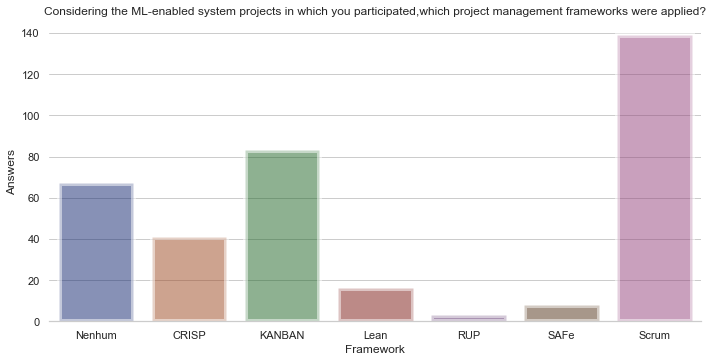

In [6]:
single_barplot(d10_df, "Project Context", "Answers", 
               title="Considering the ML-enabled system projects in which you participated,which project management frameworks were applied?",
               x_label="Framework", y_label="Answers", x_label_rotation=0)

In [11]:
list(df['D10_ML_Management_Framework_Others_Free'].unique())

['-99',
 nan,
 'Task List',
 'VModel',
 'Tailored Waterfall',
 'Kaizen',
 'TMVA',
 'Agile Style']

In [8]:
df = replace_values_by_condition(df, 'D10_ML_Management_Framework_Others_Free',
                                 'agile style (iterative, regular meetings,...) - but not fully Scrum',
                                 'Agile Style', 'eq')
df = replace_values_by_condition(df, 'D10_ML_Management_Framework_Others_Free',
                                 'TMVA - Toolkit for Multivariate Data Analysis',
                                 'TMVA', 'eq')
df = replace_values_by_condition(df, 'D10_ML_Management_Framework_Others_Free',
                                 'Tailored Waterfall/Agile',
                                 'Tailored Waterfall', 'eq')
df = replace_values_by_condition(df, 'D10_ML_Management_Framework_Others_Free',
                                 'V model',
                                 'VModel', 'eq')

In [9]:
# build simple text frequency - no preprocessing
frameworks_free = list(filter(lambda a: str(a) != '-99', list(df['D10_ML_Management_Framework_Others_Free'])))
frameworks_free = list(filter(lambda a: str(a) != 'nan', frameworks_free))
frameworks_free_dict = {}
for ff in frameworks_free:
    frameworks_free_dict[ff] = 1

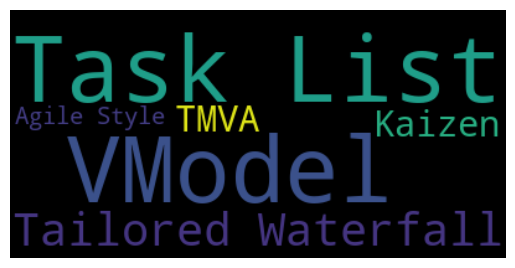

In [10]:
wordcloud(frameworks_free_dict)